# Praktikum 5 - Clustering

Clustering adalah salah satu metode dari Unsupervised Learning yang bertugas mengelompokkan data sedemikian rupa sehingga data di cluster yang sama mirip satu sama lain. Kemiripan adalah metrik yang mencerminkan kekuatan hubungan antara dua objek data.

## Import Dataset & Libraries

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import DBSCAN 
from sklearn.cluster import MeanShift, estimate_bandwidth

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- Tidak ada null values
- Hanya atribut 'Gender' yang bertipe kategorikal

In [5]:
# Rename kolom supaya lebih mudah
df.rename(columns={'Annual Income (k$)': 'Income',
                   'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exploratory Data Analysis

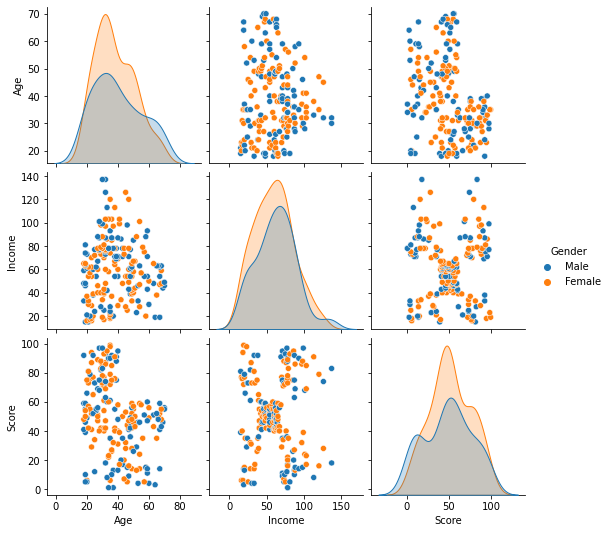

In [6]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender')
plt.show()

Plot di atas kita menunjukkan bahwa gender tidak mempengaruhi distribusi pelanggan. Kita bisa menganggap gender tidak terlalu berhubungan dengan segmentasi pelanggan (Customer). 

## Feature Engineering

In [7]:
# Drop Gender dan CustomerID untuk clustering
X = df.drop(['CustomerID', 'Gender'], axis=1)
X.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [8]:
# Data Normalization
# scaler = MinMaxScaler(feature_range=(0,1))
# X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# X_scaled

Code di atas sengaja tidak dijalankan karena hasil clustering semakin memburuk.

## K-Means

### Elbow Method

Dengan menggunakan elbow method, kita bisa menentukan nilai k yang paling cocok untuk digunakan. Pada sumbu vertikal akan diisi oleh sum squared error dari setiap k-means dan sumbu horizontal adalah nilai k nya.

In [9]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
sse

[308812.77999999997,
 212840.16982097187,
 143342.75157170597,
 104366.15145556198,
 75350.77917248776,
 58300.44332159069,
 51131.0683982684,
 44312.46881207722,
 40592.69511893991]

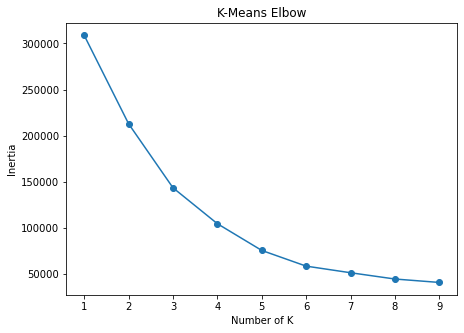

In [10]:
plt.figure(figsize=(7, 5))
plt.plot(k_range, sse, marker='o')
plt.title('K-Means Elbow')
plt.xlabel('Number of K')
plt.ylabel('Inertia')
plt.show()

Dari grafik di atas, terlihat bahwa nilai k sama dengan 3 dan 4 menjadi titik siku yang bisa digunakan untuk clustering.</br> Beberapa kandidat k yang akan dicoba: 2, 3, dan 5.

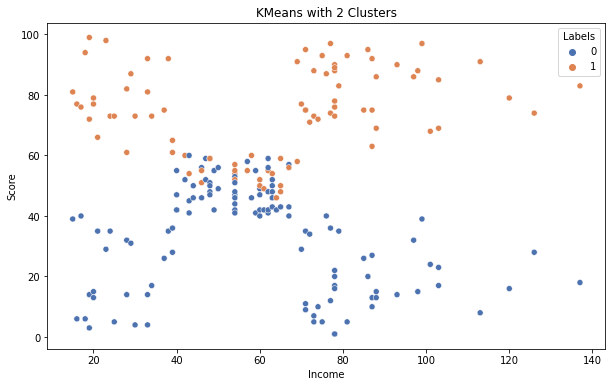

In [11]:
# Clusters 2
km2 = KMeans(n_clusters=2, random_state=0).fit(X)
X['Labels'] = km2.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], palette="deep")
plt.title('KMeans with 2 Clusters')
plt.show()

- Terlihat bahwa clustering dengan k = 2, data point masih belum terkelompokkan dengan baik karena banyak data yang saling overlapping.
- Outlier juga banyak ditemukan untuk kedua label.

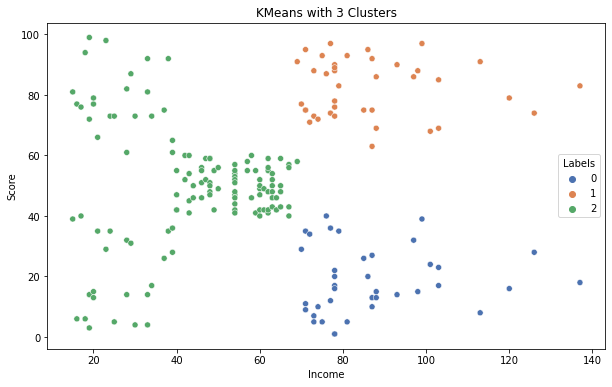

In [13]:
# Clusters 3
km3 = KMeans(n_clusters=3, random_state=0).fit(X)
X['Labels'] = km3.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], palette="deep")
plt.title('KMeans with 3 Clusters')
plt.show()

- Dengan k = 3, terlihat bahwa pengelompokan data lebih baik dibanding k = 2.
- Tidak ada data yang overlapping antar label.
- Pengelompokan dengan 3 cluster dirasa masih belum pas karena data point masih bisa dibagi menjadi lebih banyak cluster.

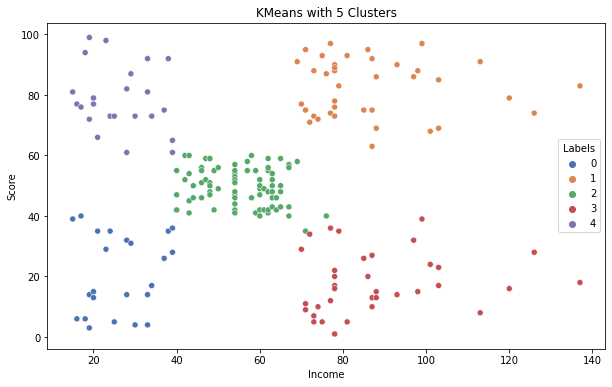

In [14]:
# Clusters 5
km5 = KMeans(n_clusters=5, random_state=0).fit(X)
X['Labels'] = km5.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], palette="deep")
plt.title('KMeans with 5 Clusters')
plt.show()

Walaupun masih terdapat outlier untuk label 1 dan 3, namun clustering dengan k=5 dirasa yang paling baik dibandingkan k=2 dan k=3.

## Agglomerative

Hierarchical clustering adalah teknik clustering membentuk hirarki atau berdasarkan tingkatan tertentu sehingga menyerupai struktur pohon. Dengan demikian proses pengelompokannya dilakukan secara bertingkat atau bertahap.</br>
Agglomerative clustering adalah pendekatan Hierarchical clustering dari bawah ke atas yang dimulai dengan setiap objek dalam satu cluster yang terpisah kemudian membentuk cluster yang semakin membesar. Jadi, banyaknya cluster awal adalah sama dengan banyaknya data.

Pada percobaan ini akan digunakan complete linkage yang merupakan salah satu teknik untuk menggabungkan cluster-cluster berdasarkan jarak antara anggota terjauh di antara dua cluster.

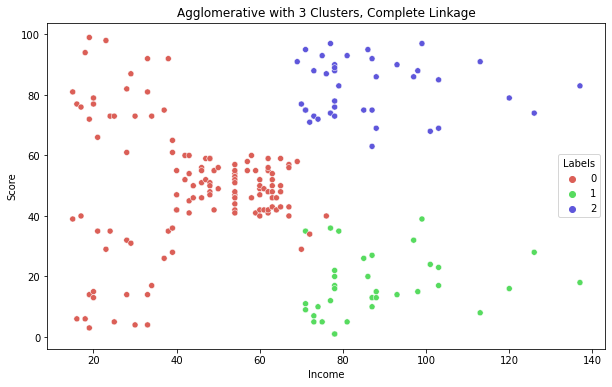

In [21]:
# 3 Clusters
agglom3 = AgglomerativeClustering(n_clusters=3, linkage='complete').fit(X)

X['Labels'] = agglom3.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 3))
plt.title('Agglomerative with 3 Clusters, Complete Linkage')
plt.show()

- Beberapa data dengan label 0 masih overlapping dengan data label 1.
- Data point di pojok kiri bawah dan kiri atas sepertinya masih bisa dikelompokkan ke cluster berbeda.

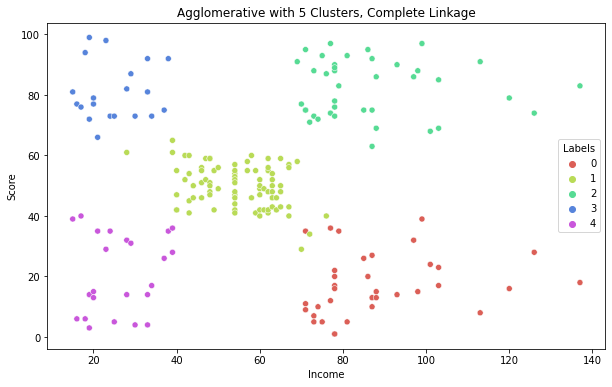

In [22]:
# 5 Clusters
agglom5 = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(X)

X['Labels'] = agglom5.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters, Complete Linkage')
plt.show()

- Beberapa data point label 1 masih overlap dengan data label 0.
- Namun, secara umum pengelompokan 5 cluster cocok untuk diterapkan pada dataset ini.

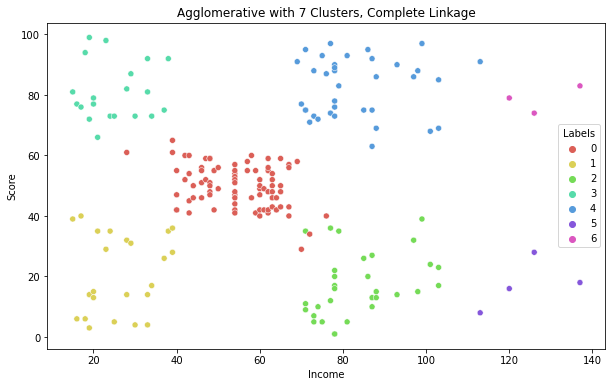

In [23]:
# 7 Clusters
agglom7 = AgglomerativeClustering(n_clusters=7, linkage='complete').fit(X)

X['Labels'] = agglom7.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 7))
plt.title('Agglomerative with 7 Clusters, Complete Linkage')
plt.show()

- Agglomerative Clustering dengan n_cluster = 5 mengelompokkan data paling baik dibandingkan n = 3 dan 7.
- Segmentasi berdasarkan pendapatan dan pengeluaran mudah direpresentasikan dengan n = 5.

Kita tahu bahwa untuk menentukan kelompok, setiap data harus dihitung terlebih dahulu matriks jaraknya. Kita bisa memakai fungsi distance_matrix untuk menghitungnya.

In [32]:
agglom5 = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(X)

X['Labels'] = agglom5.labels_

In [33]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)

Setelah itu, kita bisa menggunakan pengelompokan 'complete linkage' dengan mengambil jarak maksimum antar anggota dari dua cluster berbeda.

In [35]:
Z = hierarchy.linkage(dist, 'complete')

Pada dasarnya, hierarchical clustering paling mudah digambarkan dengan dendogram karena sistem clusteringnya secara bertahap. Setiap penggabungan diwakili oleh garis horizontal. Koordinat y dari garis horizontal adalah kesamaan dari dua cluster yang digabungkan.

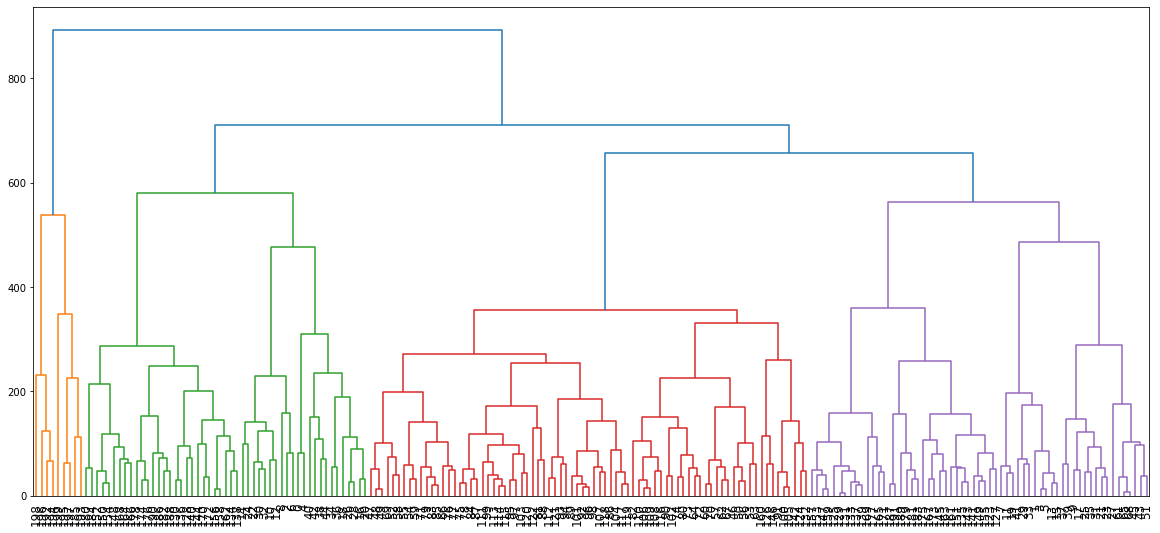

In [36]:
plt.figure(figsize=(20, 9))
dendro = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=12, orientation='top')

## DBScan

DBSCAN adalah singkatan dari Density-Based Spatial Clustering of Applications with Noise. Teknik ini adalah salah satu algoritma clustering yang bekerja berdasarkan kepadatan objek. Idenya adalah bahwa jika suatu titik tertentu milik sebuah cluster, itu harus dekat dengan banyak titik lain di cluster itu.

Ada dua parameter yang digunakan: Epsilon dan minSamples
- Epsilon menentukan radius tertentu yang jika mencakup cukup banyak titik di dalamnya, maka radius tersebut dikatakan 'dense' atau rapat.
- minSamples menentukan jumlah minimum titik data yang kita inginkan di suatu lingkungan untuk mendefinisikan sebuah cluster.

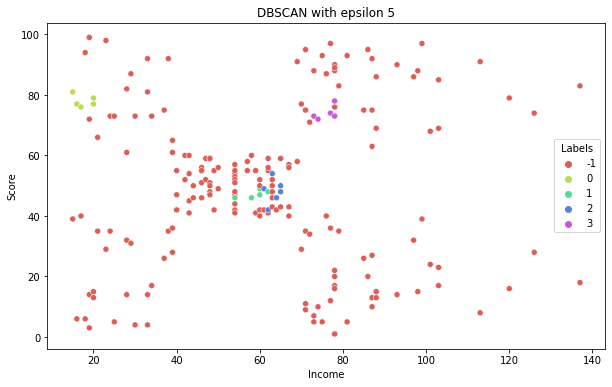

In [42]:
# Epsilon 5
db5 = DBSCAN(eps=5).fit(X)

X['Labels'] = db5.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db5.labels_).shape[0]))
plt.title('DBSCAN with epsilon 5')
plt.show()

Dengan epsilon = 5 dan minSample = 5 (default), banyak data point dikategorikan sebagai outlier (label -1). Hal ini mungkin disebabkan karena data point yang tidak saling berdekatan sehingga nilai epsilon harus diperbesar.

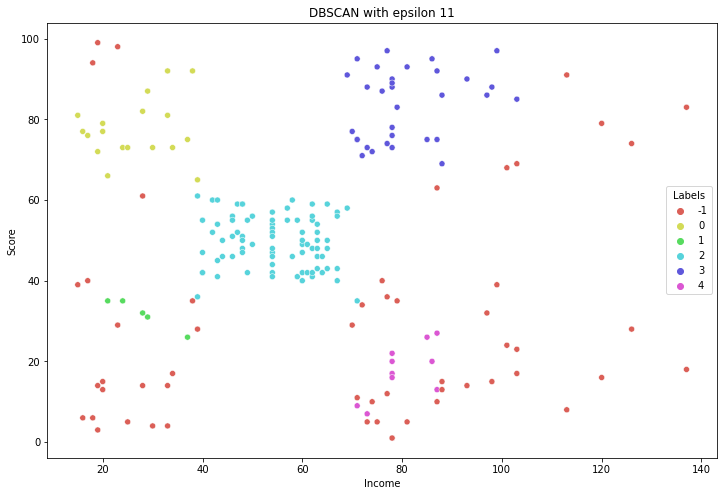

In [60]:
# Epsilon 11
db11 = DBSCAN(eps=11).fit(X)

X['Labels'] = db11.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db11.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11')
plt.show()

Dengan epsilon = 11, terbentuk 5 cluster data. Namun, terdapat banyak data yang dikategorikan sebagai outlier. 

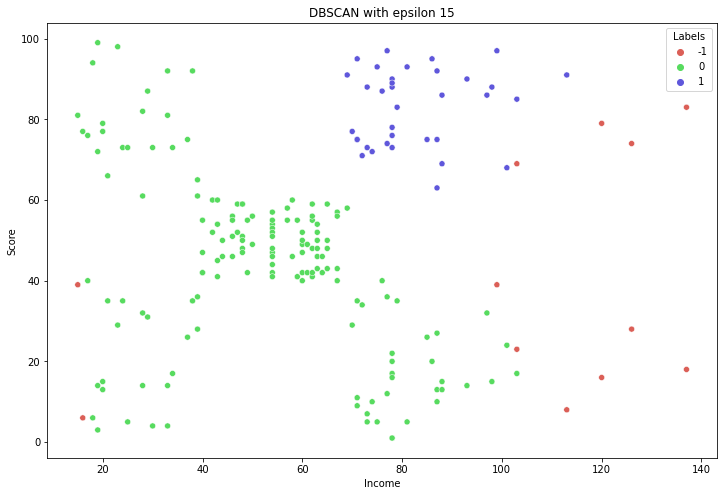

In [61]:
# Epsilon 15
db15 = DBSCAN(eps=15).fit(X)

X['Labels'] = db15.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db15.labels_).shape[0]))
plt.title('DBSCAN with epsilon 15')
plt.show()

Dengan nilai epsilon = 15, terbentuk 2 cluster plus 1 cluster sebagai outlier. Bisa dilihat bahwa outlier sudah sangat berkurang namun pembagian clusternya terlalu sedikit dan dirasa kurang bisa merepresentasikan segmentasi pelanggan berdasarkan pengeluaran dan pendapatannya.

Kesimpulannya, metode DBSCAN tidak bekerja dengan baik pada dataset ini yang mungkin disebabkan oleh density antar data yang tidak begitu kuat. Banyak data dilabeli -1 yang berarti outlier.

Dari ketiga variasi DBSCAN, DBSCAN dengan epsilon 11 bisa dianggap merepresentasikan segmentasi pelanggan paling baik.

## MeanShift

Meanshift termasuk dalam kategori algoritma clustering yang mengelompokkan data point ke kluster secara iteratif dengan menggeser poin ke mode (mode adalah kepadatan titik data tertinggi di wilayah tersebut). Dengan demikian, ini juga dikenal sebagai algoritma pencarian mode. Algoritma mean-shift memiliki aplikasi di bidang pemrosesan gambar dan visi komputer.

Algoritma ini secara otomatis menetapkan jumlah cluster, menentukan ukuran wilayah yang akan dicari. Walau begitu, jumlah cluster dapat diatur secara manual dengan mengubah nilai parameter bandwidth.

In [64]:
bandwidth = estimate_bandwidth(X, quantile=0.1)

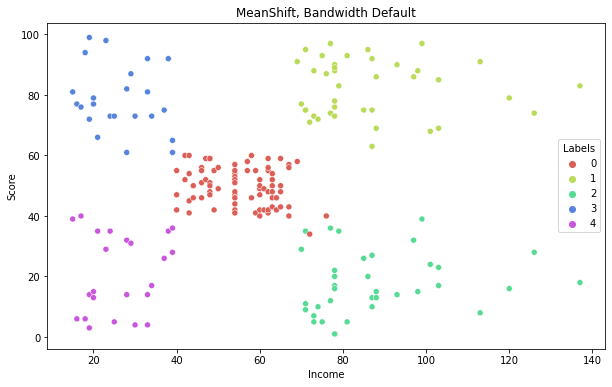

In [65]:
bw1 = bandwidth
ms = MeanShift(bandwidth=bw1).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift, Bandwidth Default')
plt.show()

Secara umum, dengan menggunakan nilai bandwidth default, pengelompokkan data dilakukan cukup baik dengan membagi menjadi 5 cluster walaupun terdapat beberapa data yang masih overlapping.

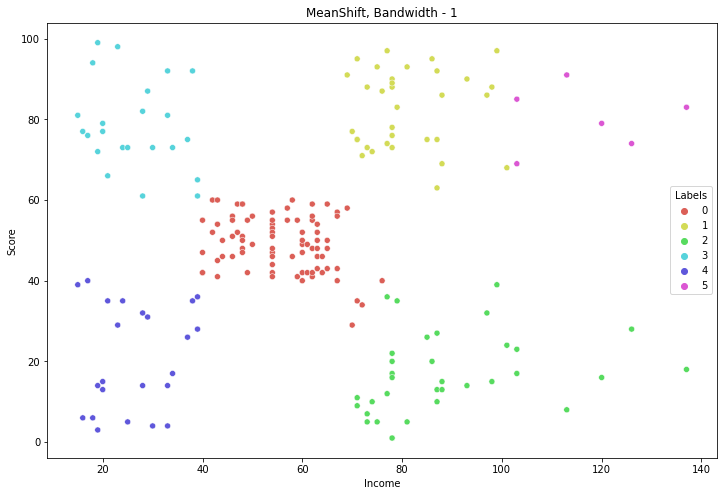

In [27]:
bw2 = bandwidth - 1
ms = MeanShift(bandwidth=bw2).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift, Bandwidth - 1')
plt.show()

Variasi kedua adalah dengan mengurangi nilai bandwidth sebanyak 1. Data dibagi menjadi 6 cluster. Secara umum keliatan bagus namun label 5 masih bisa dianggap sebagai label 1 sehingga pembagian 6 cluster sepertinya kurang tepat.

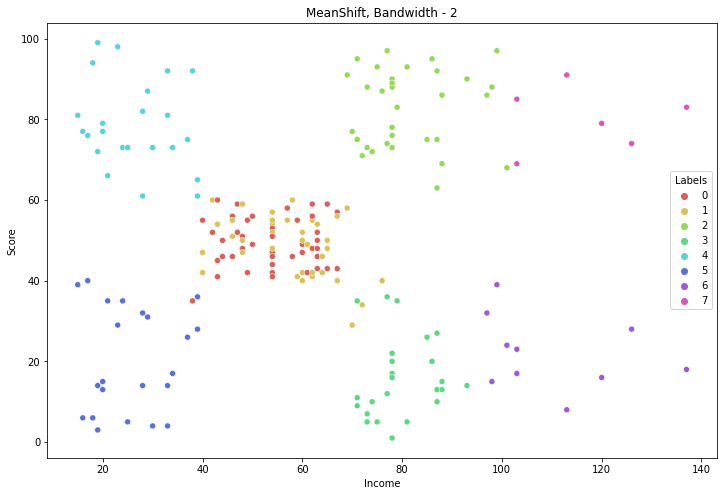

In [28]:
bw3 = bandwidth - 2
ms = MeanShift(bandwidth=bw3).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift, Bandwidth - 2')
plt.show()

Variasi terakhir adalah dengan mengurangi nilai bandwidth sebanyak 2. Terlihat banyak data yang saling overlapping pada label 0 dan 1.

Dari tiga variasi MeanShift, terlihat bahwa clustering dengan menggunakan bandwidth default (berisi nilai asli dari fungsi estimate_bandwidth) memiliki sangat baik dalam mengelompokkan data yang ada.

## Kesimpulan (Analisis Algoritma)

### Visualisasi

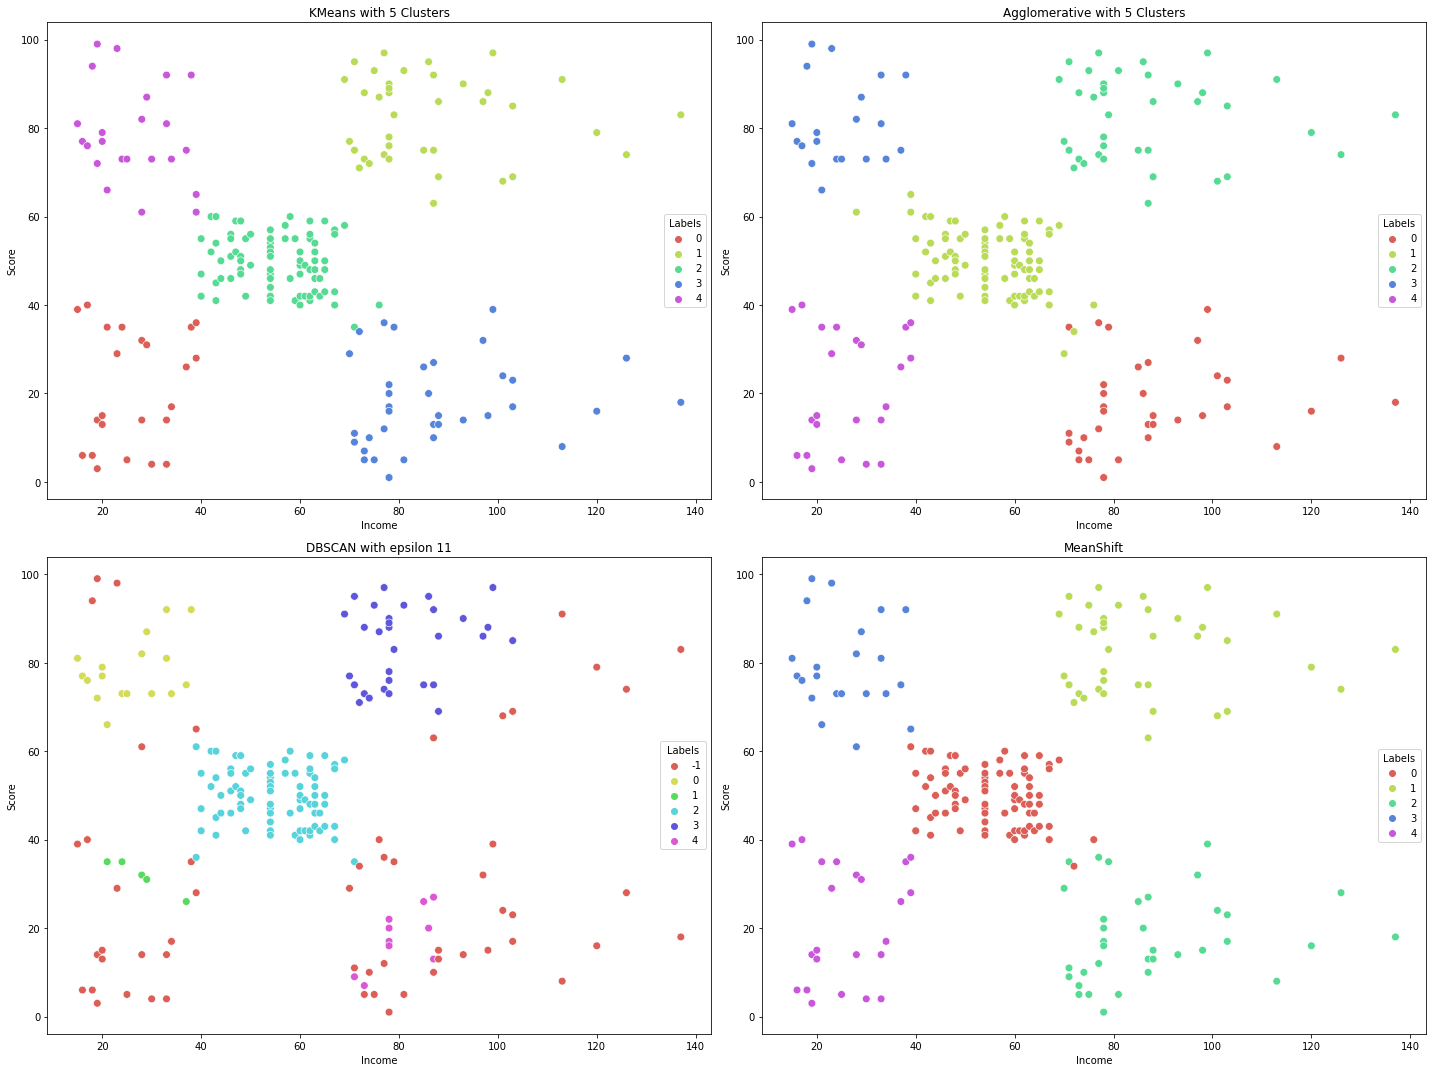

In [68]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5, random_state=0).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom5 = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(X)
X['Labels'] = agglom5.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')


##### DBSCAN #####
ax = fig.add_subplot(223)

db11 = DBSCAN(eps=11).fit(X)
X['Labels'] = db11.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db11.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 11')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)

bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()

### Analisis

- Hasil cluster oleh algoritma DBSCAN tidak terlalu baik pada dataset ini dengan banyak data dianggap sebagai outlier.
- Tiga algoritma lainnya dirasa mampu mengelompokkan data dengan baik menjadi 5 cluster. Perbedaan yang ada pada ketiga algoritma hanya terletak pada beberapa datapoint yang overlapping. Walau begitu, jumlahnya juga sedikit.
- Kesimpulannya algoritma KMeans, Agglomerative, dan MeanShift bisa digunakan untuk segmentasi pelanggan pada dataset ini.
- Saya pribadi akan memilih KMeans karena prosesnya memakan waktu yang lebih cepat dibanding dua algoritma lainnya.

Jika melihat plot KMeans, kita dapat mendefinisikan 5 cluster data sebagai berikut:

- Label 0 adalah pelanggan dengan pendapatan rendah dan pengeluaran rendah
- Label 1 adalah pelanggan dengan pendapatan tinggi dan pengeluaran tinggi
- Label 2 adalah pelanggan dengan pendapatan menengah dan pengeluaran menengah
- Label 3 adalah pelanggan dengan pendapatan tinggi dan pengeluaran rendah
- Label 4 adalah pelanggan dengan pendapatan rendah dan pengeluaran tinggi

Kita bisa memberikan pendekatan berbeda untuk setiap kelompok pelanggan.
- Pelanggan dengan pengeluaran tinggi harus dipertahankan. Salah satu caranya adalah dengan membership dan memberikan akses lebih pada member yang terdaftar.
- Pelanggan dengan pendapatan tinggi namun jarang membeli produk bisa ditawarkan promo lebih banyak agar pelanggan tersebut percaya dan lebih tertarik untuk membeli.